In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle


Identify the diabets

In [61]:
url="diabetes.csv"
df=pd.read_csv(url)
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
114            7      160             54             32      175  30.5   
463            5       88             78             30        0  27.6   
331            2       87             58             16       52  32.7   
720            4       83             86             19        0  29.3   
196            1      105             58              0        0  24.3   
208            1       96             64             27       87  33.2   
721            1      114             66             36      200  38.1   
319            6      194             78              0        0  23.5   
337            5      115             76              0        0  31.2   
21             8       99             84              0        0  35.4   

     DiabetesPedigreeFunction  Age  Outcome  
114                     0.588   39        1  
463                     0.258   37        0  
331                     0.166   25        0  
720                     0.317   34        0  
196                     0.187   21        0  
208                     0.289   21        0  
721                     0.289   21        0  
319                     0.129   59        1  
337                     0.343   44        1  
21                      0.388   50        0

In [62]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [63]:
df.shape

(768, 9)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Check the Correlation

In [66]:
corr_matrix= df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

In [67]:
df.corrwith(df["Outcome"]).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

Visualization in data

In [68]:
def half_corr_heatmap(df, title=None):
    plt.figure(figsize=(12,10))
    sns.set(font_scale=1)

    mask = np.zeros_like(df.corr())
    mask[np.tril_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(df.corr(), mask=mask, annot=True, cmap="coolwarm",linewidths=.5,fmt= '.1f')

    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

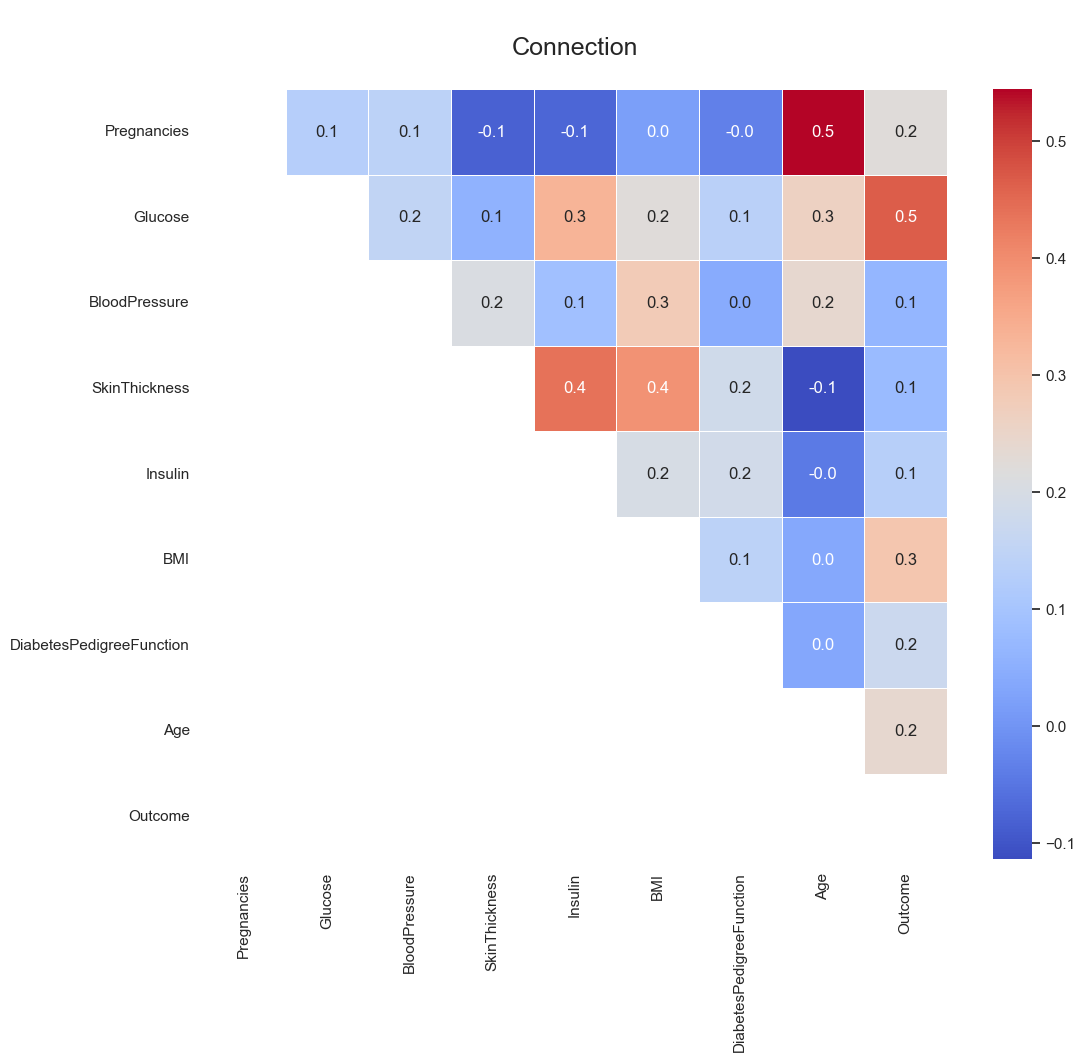

In [69]:
half_corr_heatmap(df, 'Connection')

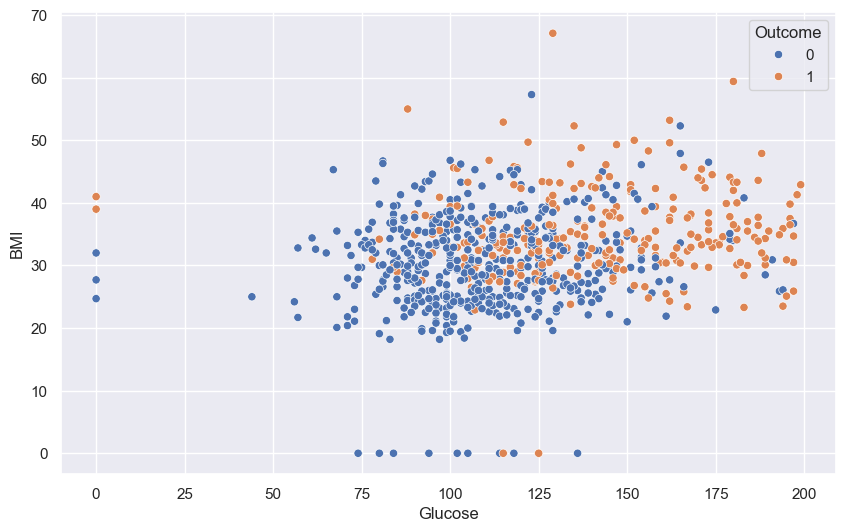

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"])
plt.show()

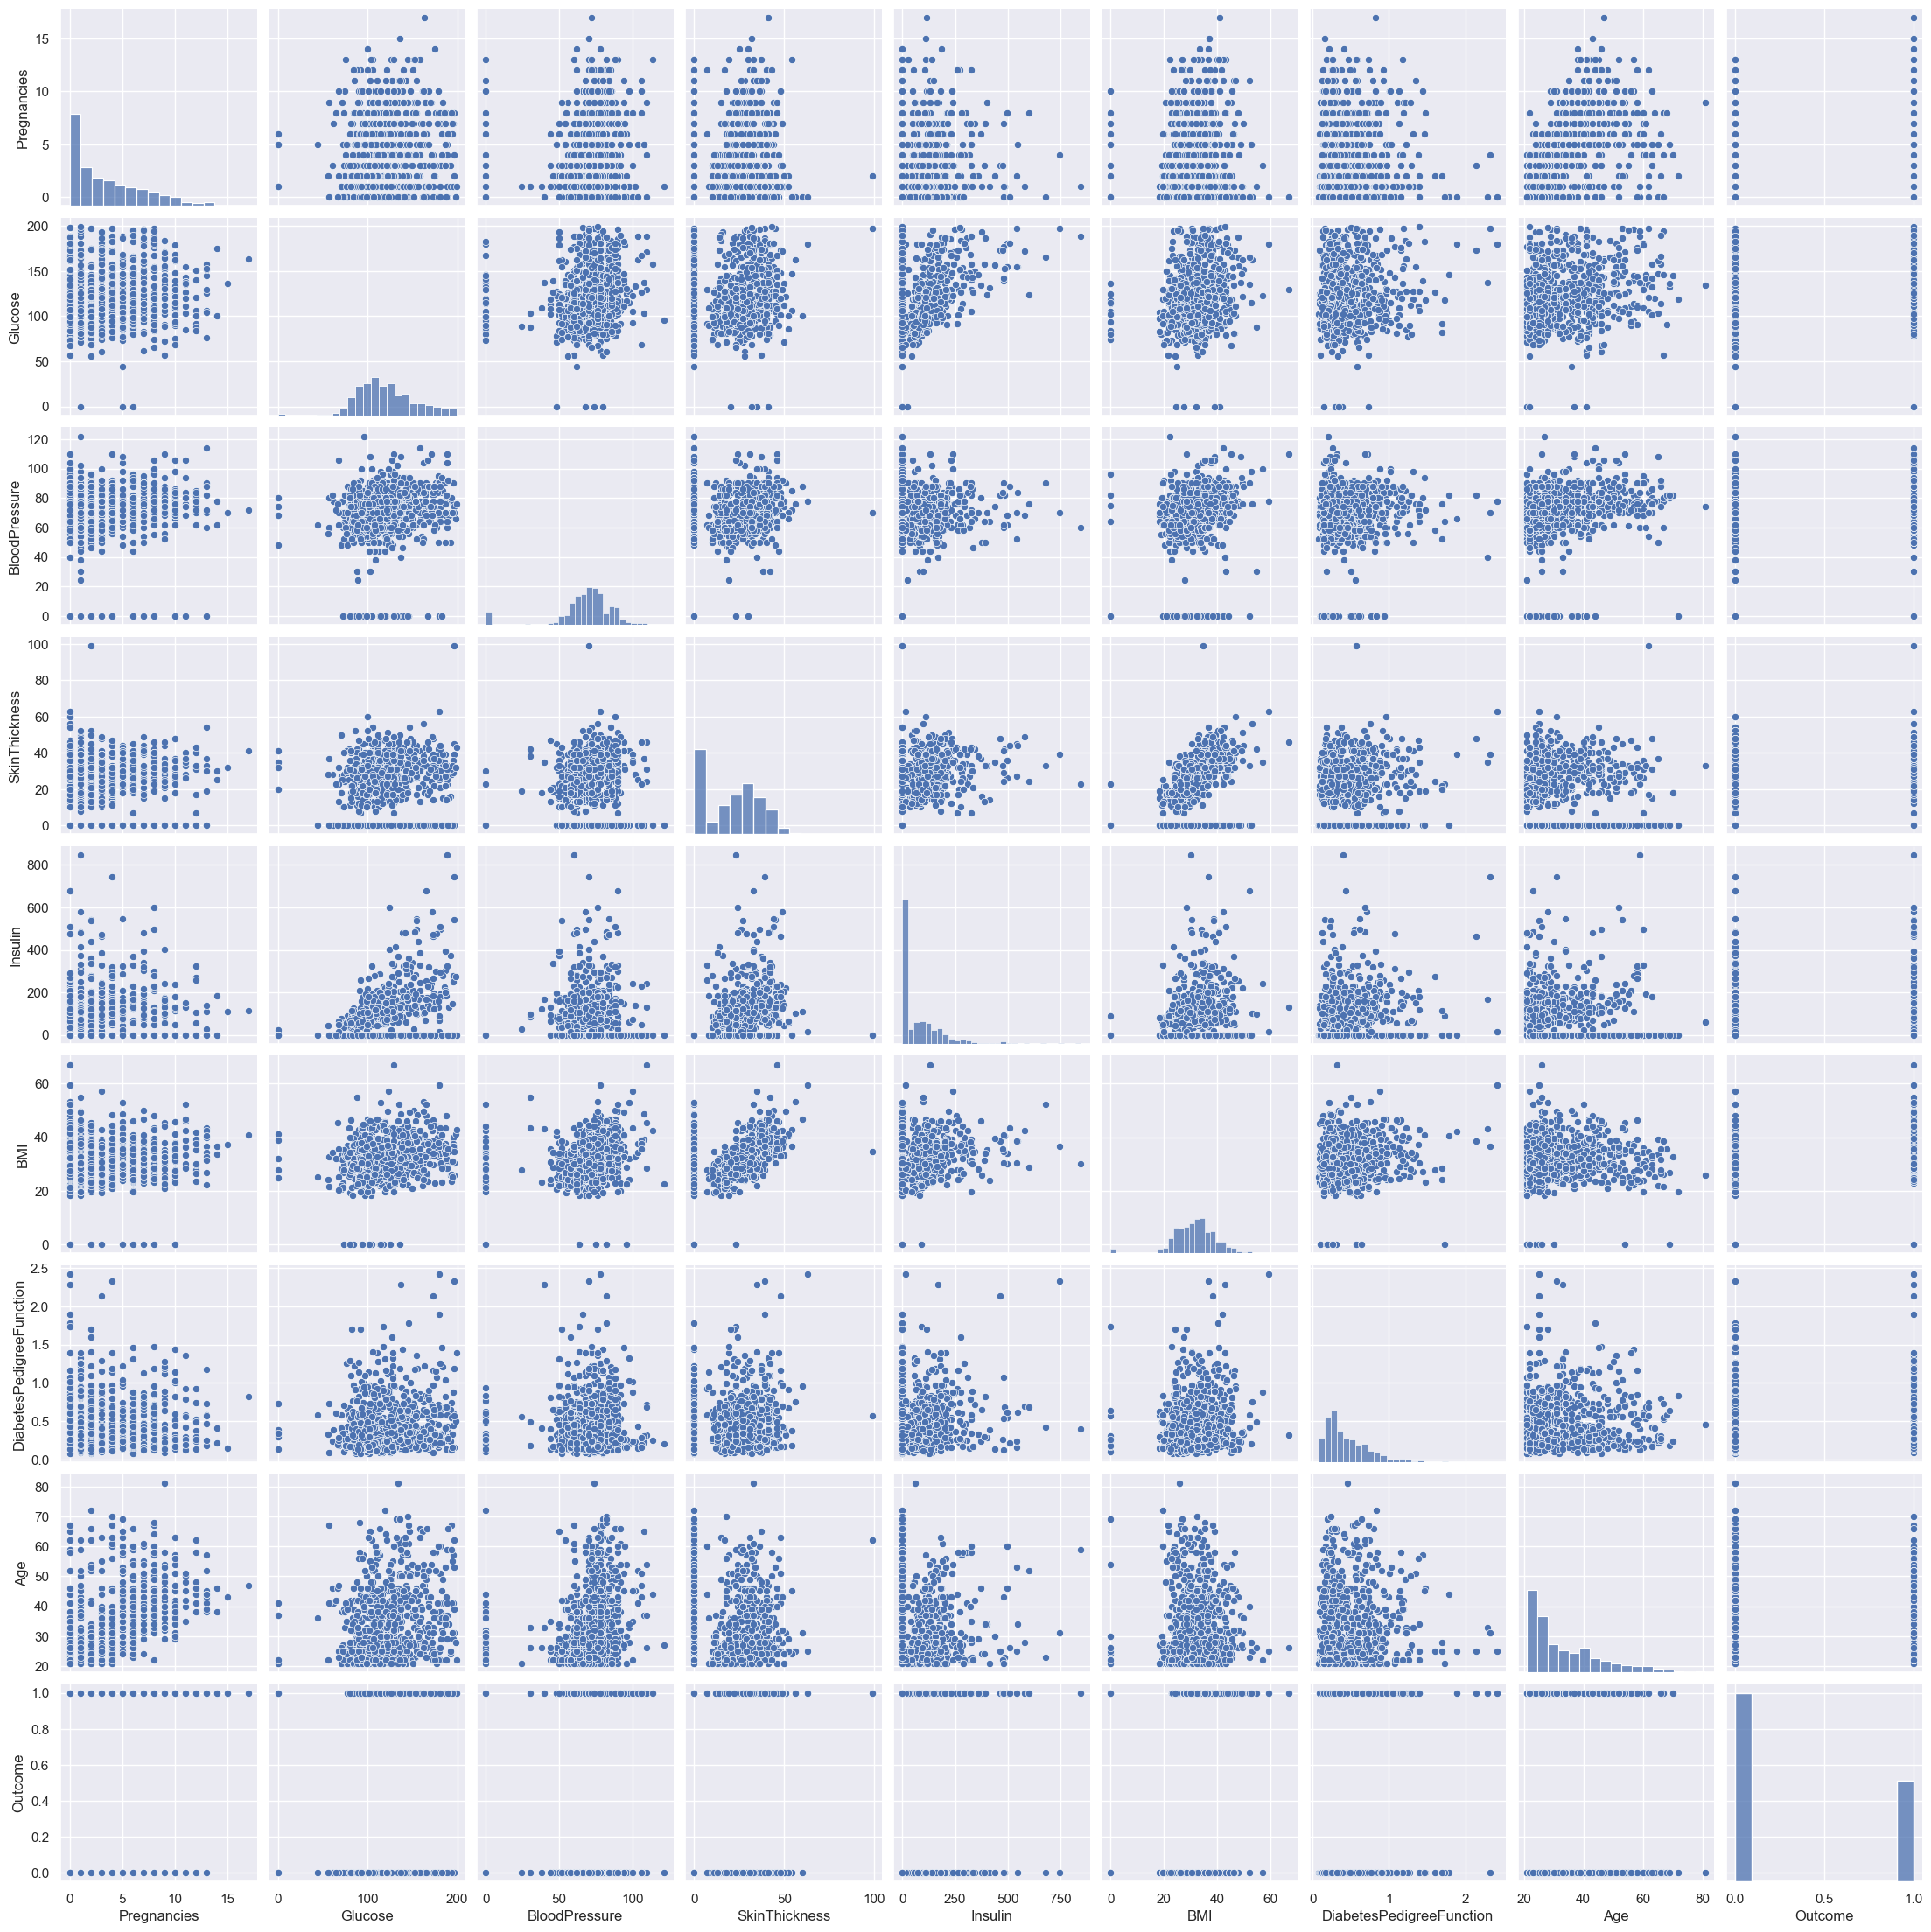

In [71]:
sns.pairplot(df)
plt.show()

Prepare to ML

In [72]:
X=df.drop("Outcome", axis=1).values
y=df["Outcome"]


In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [74]:
pickle.dump(scaler, open('./Diabetes Prediction App/scaler.pkl','wb'))

Machine Leraning

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test=train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Choose model

KNeighborsClassifier(n_neighbors=10)

In [76]:
# Sauvegarder le modèle avec pickle
with open("./Diabetes Prediction App/knn_model.pkl", "wb") as file:
    pickle.dump(knn, file)

Prediction

In [77]:
y_predict=knn.predict(X_test)
y_predict


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [78]:

test_label= knn.predict(X_test)
pd.DataFrame({"Prediction": y_predict, "Real value": test_label})

Prediction  Real value
0             0           0
1             0           0
2             0           0
3             1           1
4             1           1
..          ...         ...
149           1           1
150           0           0
151           0           0
152           0           0
153           0           0

[154 rows x 2 columns]

In [79]:
# Charger le modèle sauvegardé (à utiliser plus tard)
with open("./Diabetes Prediction App/knn_model.pkl", "rb") as file:
    knn_loaded = pickle.load(file)

Evaluating Model

In [80]:
from sklearn.metrics import accuracy_score
print("Model accuracy:", accuracy_score(test_label, y_predict))

Model accuracy: 1.0
